# Part III: Training a model

Authors: Jordi Bolibar & Facundo Sapienza

In this notebook, we will focus on how to train different machine learning models with the dataset we have prepared. For now, we will forget about cross-validation and test, and we will just focus on the specificities of each method to familiarize ourselves with classic machine learning approaches. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 3.1 Setup

At this point, `df_all` has all the data we will need to train, validate and test the model. However, before moving forward to training a machine learning model with this data, we need to separate an part of the dataset for testing the model and be sure we are not overfitting the model. 

For testing, we can use different strategies:
1. Separate all the data for some given set of glaciers and use all the rest for training/validation
1. Separate all the data for some given set of glaciers at period (2010-2020) and use all the rest for trainign/validation
1. Separate all the data for some given set of glaciers at the period 2010-2020 and use all the measurements for rest of the glaciers and the other period 2000-2010 for training/validation.

Following the reasoning of the previous notebook, since this dataset is very rich in the *spatial* domain, we are going to split it in that dimension instead of the *temporal* one. By doing so, we will attempt to predict glacier changes for glaciers in Scandinavia for which we have not "seen" any observations. 

We read the previously stored dataset with the feature matrix and the target data.

In [2]:
df_all = pd.read_csv('Data/df_all.csv', index_col=['rgi_id', 'period'])
df_all

PDD    area  icecap     lat     prcp_01   
rgi_id         period                                                     
RGI60-08.00001 2000-2010  39.787001   0.030     0.0  67.930   59.556398  \
               2010-2020  41.833601   0.030     0.0  67.930   57.685775   
RGI60-08.00002 2000-2010  44.907200   0.030     0.0  67.870   62.082497   
               2010-2020  46.980223   0.030     0.0  67.870   59.345685   
RGI60-08.00003 2000-2010  35.337201   0.020     0.0  67.820   60.485810   
...                             ...     ...     ...     ...         ...   
RGI60-08.03415 2010-2020  34.757735   0.056     0.0  66.729  131.108065   
RGI60-08.03416 2000-2010  66.325377  14.152     0.0  66.006  160.244277   
               2010-2020  66.505066  14.152     0.0  66.006  174.868147   
RGI60-08.03417 2000-2010  53.358777   0.150     0.0  65.923  152.880332   
               2010-2020  53.116888   0.150     0.0  65.923  165.529468   

                             prcp_02     prcp_03     prcp_04     prcp_05   
rgi_id         period                                                      
RGI60-08.00001 2000-2010   42.393607   49.464068   40.707838   28.460900  \
               2010-2020   45.119089   49.848962   37.706105   33.120270   
RGI60-08.00002 2000-2010   43.677873   49.432192   41.313322   28.519503   
               2010-2020   45.845166   49.957571   37.644466   32.577409   
RGI60-08.00003 2000-2010   45.600863   55.059464   46.842254   33.796713   
...                              ...         ...         ...         ...   
RGI60-08.03415 2010-2020  107.707591  144.610990   98.574383   92.859806   
RGI60-08.03416 2000-2010  183.438569  186.103358  190.792902  139.485696   
               2010-2020  146.277851  205.123464  136.355639  129.459209   
RGI60-08.03417 2000-2010  173.554018  177.555157  183.980329  133.112843   
               2010-2020  138.168895  196.729779  132.081722  123.916238   

                             prcp_06  ...   temp_09    temp_10    temp_11   
rgi_id         period                 ...                                   
RGI60-08.00001 2000-2010   32.946557  ...  8.765555  13.037779  10.950000  \
               2010-2020   41.740137  ...  8.942221  13.034446  11.120000   
RGI60-08.00002 2000-2010   32.153049  ...  9.274814  13.517038  11.384073   
               2010-2020   40.674079  ...  9.423703  13.538149  11.500740   
RGI60-08.00003 2000-2010   38.831589  ...  7.059999  11.433335   9.346666   
...                              ...  ...       ...        ...        ...   
RGI60-08.03415 2010-2020  111.586080  ...  4.860000   8.513335   7.726667   
RGI60-08.03416 2000-2010  115.362394  ...  6.778889   9.997777   9.253333   
               2010-2020  140.041785  ...  6.448889   9.764443   9.126666   
RGI60-08.03417 2000-2010  112.064028  ...  7.277778  10.505554   9.549999   
               2010-2020  134.381284  ...  6.947778  10.288887   9.436666   

                           temp_12    zmax    zmed    zmin    dmdtda   
rgi_id         period                                                  
RGI60-08.00001 2000-2010  6.391112   250.0   242.0   235.0 -0.458772  \
               2010-2020  7.227779   250.0   242.0   235.0 -0.356250   
RGI60-08.00002 2000-2010  6.784445   246.0   239.0   228.0 -0.458772   
               2010-2020  7.632223   246.0   239.0   228.0 -0.356250   
RGI60-08.00003 2000-2010  4.700001   749.0   726.0   701.0 -0.458772   
...                            ...     ...     ...     ...       ...   
RGI60-08.03415 2010-2020  4.133333  1330.0  1314.0  1289.0  0.534500   
RGI60-08.03416 2000-2010  5.060001  1811.0  1581.0   890.0 -0.737400   
               2010-2020  5.783334  1811.0  1581.0   890.0 -0.649400   
RGI60-08.03417 2000-2010  5.363334  1318.0  1186.0  1090.0 -0.616100   
               2010-2020  6.070001  1318.0  1186.0  1090.0  0.389200   

                          err_dmdtda  target_id  
rgi_id         period                            
RGI60-08.00001 2000-2010    

### Separation into train and test

Now we need to split our dataset into train and test. We are going to keep 70% of glaciers for training and 30% for test. It is very important NOT to use the test dataset until the very end of our training, once we are sure we have found the best hyperparameters. 

In [3]:
glaciers_ids_all = np.unique(df_all.index.get_level_values(0).values)

glacier_train, glacier_test = train_test_split(glaciers_ids_all, 
                                               train_size=0.3,
                                               test_size=0.7)

df_train_all = df_all.loc[glacier_train]
df_test = df_all.loc[glacier_test]
df_train_all.shape, df_test.shape

((2050, 37), (4784, 37))

We save the test dataset into a file in order to put it aside.

In [4]:
df_test.to_csv('Data/df_test.csv')

### Separation into validation and train

Now we are going to train the models based on the train dataset, which will have to be split again into train and validation. As a reminder, the train dataset will be given to the machine learning models in order to fit the data, and the validation dataset will be set aside, in order to tune the hyperparameters of the model so they best fit the out-of-sample validation dataset. This is done to avoid overfitting and to select a set of model hyperparameters that best generalize unseen data. 

A simple and naive way of doing so, is doing a simple split of 80% for train, and 20% for validation. Bear in mind that here the new train dataset is just a subset of the previous train dataset. From the original dataset, we have split things in the following way:

Full dataset:
* Test dataset -> set aside
* Train dataset -> split further into train/validation
    + Validation dataset -> used for hyperparameter selection
    + Train dataset -> actual train dataset fed to the different machine learning models

For now, we will just split the dataset into 80% train, 20% test.

In [6]:
glaciers_ids = np.unique(df_train_all.index.get_level_values(0).values)

train_dataset, validation_dataset = train_test_split(glaciers_ids, 
                                               train_size=0.8,
                                               test_size=0.2)

df_train = df_all.loc[train_dataset]
df_validation = df_all.loc[validation_dataset]
df_train.shape, df_validation.shape

((1640, 37), (410, 37))

And now we need to separate the feature matrix ($X$) from the target data ($Y$), since they need to be fed separately to the models. This will give us 4 different datasets:
- Training datasets:
    - `X_train`
    - `y_train`
- Validation datasets:
    - `X_validation`
    - `y_validation`

In [7]:
features_to_drop = ['dmdtda', 'err_dmdtda', 'target_id']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['dmdtda']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_validation_X = df_validation.drop(features_to_drop, axis=1)
df_validation_y = df_validation[['dmdtda']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [8]:
df_train_X

PDD   area  icecap     lat     prcp_01   
rgi_id         period                                                    
RGI60-08.01616 2000-2010  71.515151  0.061     0.0  66.836  227.647805  \
               2010-2020  71.318262  0.061     0.0  66.836  252.158046   
RGI60-08.00774 2000-2010  65.981777  0.050     0.0  62.365  156.981022   
               2010-2020  65.692333  0.050     0.0  62.365  162.963731   
RGI60-08.02454 2000-2010  38.925200  0.042     0.0  68.302   73.754478   
...                             ...    ...     ...     ...         ...   
RGI60-08.00163 2010-2020  46.147244  0.616     0.0  67.330   43.451476   
RGI60-08.01989 2000-2010  47.009821  0.140     0.0  61.391  219.850909   
               2010-2020  46.103140  0.140     0.0  61.391  217.887660   
RGI60-08.01110 2000-2010  69.683000  9.932     0.0  61.687  192.849654   
               2010-2020  69.183667  9.932     0.0  61.687  196.246007   

                             prcp_02     prcp_03     prcp_04     prcp_05   
rgi_id         period                                                      
RGI60-08.01616 2000-2010  242.822642  242.904355  232.702040  185.919480  \
               2010-2020  199.266092  254.339017  165.630222  163.684515   
RGI60-08.00774 2000-2010  176.369816  192.150882  188.151459  131.155069   
               2010-2020  143.964111  200.922334  134.671595  111.715512   
RGI60-08.02454 2000-2010   73.306824   75.781743   75.479564   66.299960   
...                              ...         ...         ...         ...   
RGI60-08.00163 2010-2020   45.810371   51.918631   37.582134   34.678069   
RGI60-08.01989 2000-2010  220.156427  229.581238  233.757319  154.367752   
               2010-2020  187.402467  239.439860  172.542368  134.047450   
RGI60-08.01110 2000-2010  204.112927  220.780548  219.247685  147.559570   
               2010-2020  171.888774  229.850602  161.107226  126.864694   

                             prcp_06  ...    temp_06   temp_07   temp_08   
rgi_id         period                 ...                                  
RGI60-08.01616 2000-2010  143.950412  ...  -2.601111  1.294444  5.037037  \
               2010-2020  192.677216  ...  -2.074444  0.912222  5.218148   
RGI60-08.00774 2000-2010  116.448166  ...  -2.758889  1.295926  5.361111   
               2010-2020  135.379774  ...  -2.345556  0.881481  5.308889   
RGI60-08.02454 2000-2010   49.778646  ... -10.340001 -4.763333  0.360000   
...                              ...  ...        ...       ...       ...   
RGI60-08.00163 2010-2020   47.316250  ... -11.596666 -5.596666  0.736667   
RGI60-08.01989 2000-2010  135.158211  ...  -3.945926 -0.164444  3.956666   
               2010-2020  146.167576  ...  -3.487037 -0.530000  3.872222   
RGI60-08.01110 2000-2010  128.493449  ...  -3.366666  0.593333  4.646667   
               2010-2020  142.861790  ...  -2.946666  0.193333  4.556667   

                           temp_09    temp_10    temp_11   temp_12    zmax   
rgi_id         period                                                        
RGI60-08.01616 2000-2010  8.108148  11.396297  10.989260  7.331852   920.0  \
               2010-2020  7.739259  11.122964  10.791483  8.111853   920.0   
RGI60-08.00774 2000-2010  8.411482  11.103703  10.620740  6.929259  1264.0   
               2010-2020  8.224816  10.825925  10.347407  7.171482  1264.0   
RGI60-08.02454 2000-2010  5.693335   9.656666   8.323333  3.176666  1382.0   
...                            ...        ...        ...       ...     ...   
RGI60-08.00163 2010-2020  5.975555   9.745556   8.007777  3.803333  1866.0   
RGI60-08.01989 2000-2010  7.525555  10.165555   9.594814  5.826667  1344.0   
               2010-2020  7.386666   9.886667   9.329259  6.045556  1344.0   
RGI60-08.01110 2000-2010  7.999999  10.706667  10.116667  6.320000  1797.0   
               2010-2020  7.839999  10.396667   9.846667  6.550001  1797.0   

                            zmed    zmin  
rgi_id         period            

## 3.2 Training a model 

The `sklearn` package includes multiple regression models we can try on the dataset. One of the advantages of using `sklearn` is that the syntax and logic is shared among different algorithms, making easy to try and compare different models. The [sklearn documentation](https://scikit-learn.org/stable/auto_examples/index.html#examples) includes multiple of these examples that are worth exploring. 

Some regression methods to explore include
1. Classical continuous regression approaches: linear regression, logistic regression, support vector machines.
1. Tree-based regression: decision trees, random forest, ensemble methods based on boosting.
1. Neural networks.

The following plot function will be useful in order to report the performance of the different models.

In [9]:
def plot_prediction(y1, y2, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation", fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -2.5
    lineEnd = 1.5
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

### 3.2.1. Linear Regression

Linear regression is the most basic type of regression we can use in our dataset. Therefore, it represents the baseline model on which to compare the rest. In this section we will use `ElasticNet`, a linear regression with combined $L_1$ and $L_2$ regularization terms.

```{note}
If you would like to better understand linear regression and regularization, we highly recommend taking a look at [this wonderful Notebook](https://machine-learning-in-glaciology-workshop.github.io/Lecture-materials/Stats/linear_regression.html) that Ellie Abrahams prepared for this workshop. 
```

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

For linear regression and many other methods, we will scale the data to have zero mean and unit variance.

In [11]:
#scaling -- normalizing so everything is unitless and can be compared
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

ElasticNet is a linear regression model that includes the classical ordinary least square error estimator (`alpha=0.0`), Lasso (`l1_ratio=1`) and Ridge (`l1_ratio=0`) regression in one single method. 

Here, we are going to fit an `ElasticNet` model to our train dataset, with the following hyperparameters.

In [13]:
%time
reg_linear = ElasticNet(alpha=0.001,
                        l1_ratio=0.8,
                        fit_intercept=True, 
                        random_state=666)
reg_linear.fit(X_train_scaled, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


ElasticNet(alpha=0.001, l1_ratio=0.8, random_state=666)

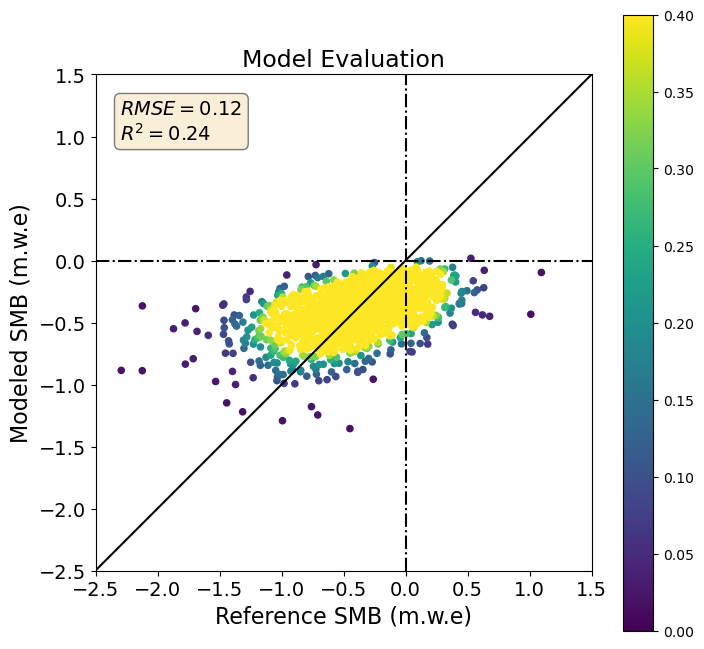

In [14]:
plot_prediction(y_train, reg_linear.predict(X_train_scaled), n_toplot=5000)

We can see that performance is not great, since we haven't done any hyperparameter selection. We will leave that for the following notebook, and here we'll just focus on having an overview of all the methods and their particular hyperparameters. 

### 3.2.2. Decision Tree Regression

Decision trees are non-parametric supervised learning methods. The objective of this method is to generate a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

For more details, you can read the [`sklearn` documentation](https://scikit-learn.org/stable/modules/tree.html#tree). 

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

For now, we will just fill some of the hyperparameters to see how it behaves. 

In [16]:
%%time
reg_tree = DecisionTreeRegressor(random_state=0, 
                                 max_depth=5, 
                                 min_samples_split=5)
reg_tree.fit(X_train, y_train)

CPU times: user 18.6 ms, sys: 0 ns, total: 18.6 ms
Wall time: 17.9 ms


DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=0)

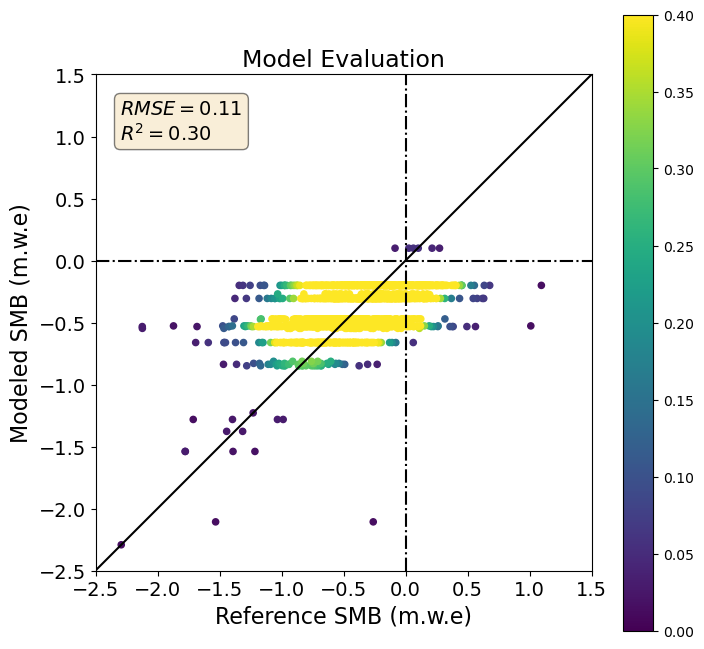

In [17]:
plot_prediction(y_train, reg_tree.predict(X_train), n_toplot=5000)

Again, we can see performance is not good at all, since we still need to do a proper search of hyperparameters. 

### 3.2.3. Ensemble of trees

We can try examples of models that combine slow learners. These models tend to work very well and be quite general. However, tuning the different hyperparameters of the model can be tricky and something that will be explored in detail in the next notebook. 

These methods are [particularly powerful for tabular data](https://arxiv.org/abs/2207.08815), the exact type of data that we have here in this project. We will be using two of the best tree ensemble methods: Random Forest and Gradient Boosting. Here you can find an example based on [Gradient boosting regression](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py).

In [18]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance

As you can see, here we start having a greater amount of hypereparameters. Therefore, doing a good hyperparameter selection will be crucial for this methods to correctly fit the data in validation. 

In [19]:
#model = 'random forest'
model = 'gradient boosting'

if model == 'gradient boosting':

    params = {
        "n_estimators": 300, #number of boosting stages to perform, larger usually better
        "max_depth": 4, #try between 3-4, or 8-9
        "min_samples_split": 5,
        "learning_rate": 0.1, #relaxation coefficient -- being conservative
        "loss": 'huber', #"squared_error",
        "validation_fraction": 0.2
    }
    reg_ensemble = ensemble.GradientBoostingRegressor(**params)
    
elif model == 'random forest':
    
    params = {
        "n_estimators": 300,
        "max_depth": 4,
        "min_samples_split": 5,
        "criterion": "absolute_error",
        'max_features': 10,
    }
    reg_ensemble = ensemble.RandomForestRegressor(**params)

In [20]:
%%time
reg_ensemble.fit(X_train, y_train)

/home/jovyan/envs/finse_modelling/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 5.32 s, sys: 0 ns, total: 5.32 s
Wall time: 5.33 s


GradientBoostingRegressor(loss='huber', max_depth=4, min_samples_split=5,
                          n_estimators=300, validation_fraction=0.2)

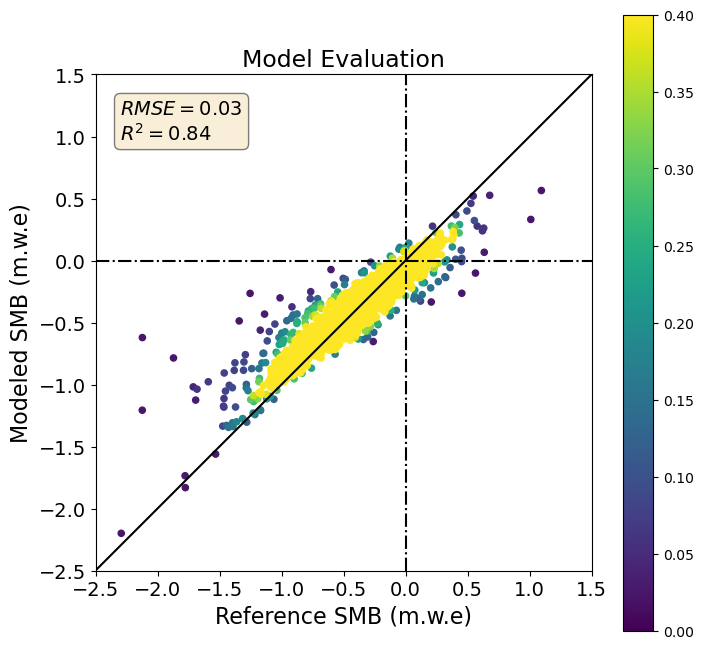

In [21]:
plot_prediction(y_train, reg_ensemble.predict(X_train), n_toplot=5000)

For this case, the default results are not that bad, but they could be improved with a hyperparameter search. 

Another interesting aspect of tree-based methods is their interpretability. It is rather easy to extract the feature importance and permutation importance, which can give us important clues on the contribution of each feature (and therefore different forcing variables) to determine glacier-wide mass balance in Scandinavia.

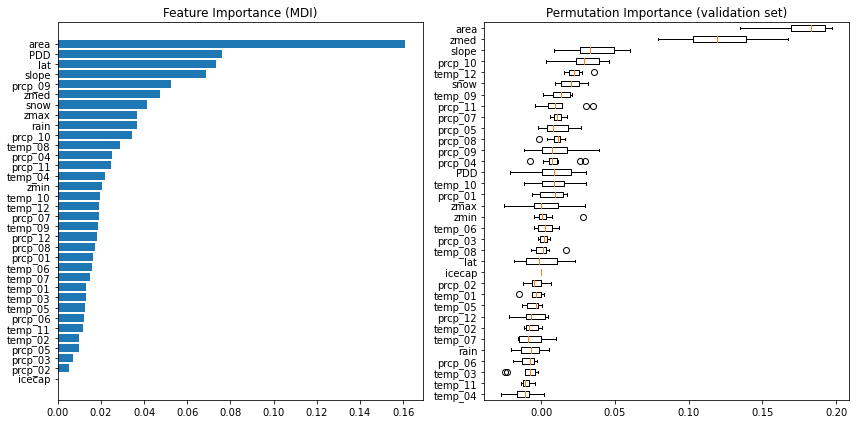

In [27]:
feature_importance = reg_ensemble.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_validation_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg_ensemble, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_validation_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (validation set)")
fig.tight_layout()
plt.show()

### 3.2.4. Neural Network

Neural networks are some of the most powerful machine learning methods available. Nonetheless, they are much harder to calibrate, due to they huge number of hyperparameters, architecture choices and the fact that they also have parameters (weights) that need to be trained in an iterative fashion using gradient descent. 

In this case, we will use the simplest of neural networks, a classic Multilayer Perceptron with a small architecture with two hidden layers. We will still use `sklearn` for this, although for more serious modelling we highly recommend using more advanced dedicated libraries such as JAX, PyTorch or Keras/Tensorflow.

In [22]:
from sklearn.neural_network import MLPRegressor

These are some of the hyperparameters that `sklearn` lets us choose for the neural network. We use a small `(50,30,20,10)` architecture, a `ReLu` activation function, an LBFGS optimizer (generally better than ADAM for small networks), a batch size of 100, 200 epochs of training, and we shuffle the batches to improve the learning. 

Note that `sklearn` also allows us to choose a fraction of the dataset to be used for validation to set up early stopping (i.e. stopping the training once we see that the loss is no longer decrease for a given number of epochs). 

In [29]:
reg_nn = MLPRegressor(hidden_layer_sizes=(50,30,20,10), #the number of neurons in the ith hidden layer
                      activation='relu', # activation funciton for the hidden layer, relu = rectified linear function
                      solver='lbfgs', # or optimizer-- solver for weight optimization
                      batch_size=100, # size of minibatches for stochastic optimizers
                      max_iter=600, # maximum number of interations
                      learning_rate='adaptive', # learning rate schedule for weight updates
                      shuffle=True, 
                      validation_fraction=0.1)

In [30]:
%%time
reg_nn.fit(X_train_scaled, y_train)

/home/jovyan/envs/finse_modelling/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 10.8 s, sys: 6.48 s, total: 17.2 s
Wall time: 4.41 s


/home/jovyan/envs/finse_modelling/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(batch_size=100, hidden_layer_sizes=(50, 30, 20, 10),
             learning_rate='adaptive', max_iter=600, solver='lbfgs')

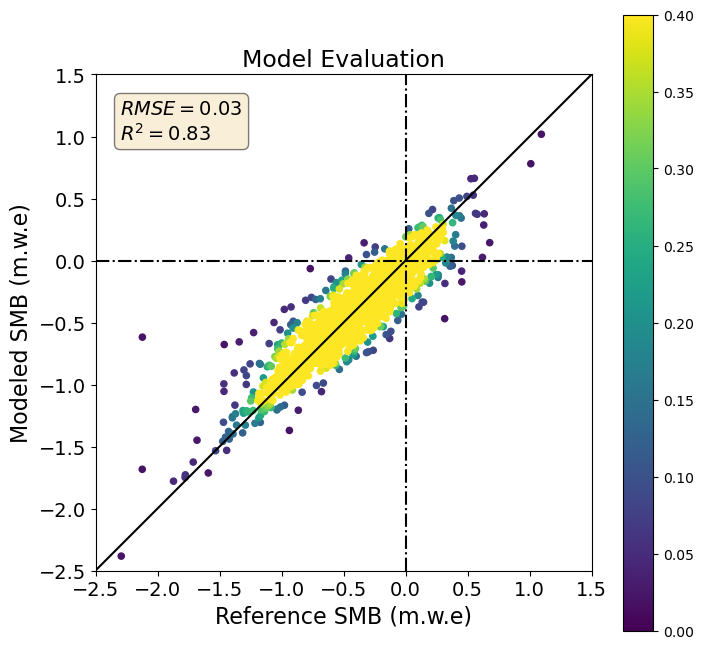

In [31]:
plot_prediction(y_train, reg_nn.predict(X_train_scaled), n_toplot=5000)

Same as for the tree-based methods, we can see that this neural network, even with minor hyperparameter tuning, is already quite capable of modelling the variability of glacier-wide mass balance for the training dataset. Now we need to make sure that it is also capable of correctly extrapolating to "unseen" glaciers from the test dataset!

## [ **Exercice 2** ]
<img src="Figures/eye_logo.png" width="75"/>

Choose 2 or 3 different ML models, and play with the hyperparameters in order to improve the performance **in validation** by looking at the scatter plot. You just need to reproduce the same workflow, but using the validation dataset for visualizing the results instead of the training one. 

This is just a rough way to have a best first estimate of good hyperparameters. In the next notebook we will see how to correctly look for the best possible hyperparameters by using cross-validation. 

In [69]:
#model = 'random forest'
model = 'gradient boosting'

if model == 'gradient boosting':

    params = {
        "n_estimators": 300,
        "max_depth": 6,
        "min_samples_split": 5,
        "learning_rate": 0.2,
        "loss": 'huber', #"squared_error",
        "validation_fraction": 0.2
    }
    reg_ensemble = ensemble.GradientBoostingRegressor(**params)
    
elif model == 'random forest':
    
    params = {
        "n_estimators": 500,
        "max_depth": 6,
        "min_samples_split": 6,
        "criterion": "absolute_error",
        'max_features': 10,
    }
    reg_ensemble = ensemble.RandomForestRegressor(**params)
    
    
# max_depth: 6 --> R2 = 0.96

In [70]:
%%time
reg_ensemble.fit(X_train, y_train)

/home/jovyan/envs/finse_modelling/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 8.4 s, sys: 3.33 ms, total: 8.4 s
Wall time: 8.4 s


GradientBoostingRegressor(learning_rate=0.2, loss='huber', max_depth=6,
                          min_samples_split=5, n_estimators=300,
                          validation_fraction=0.2)

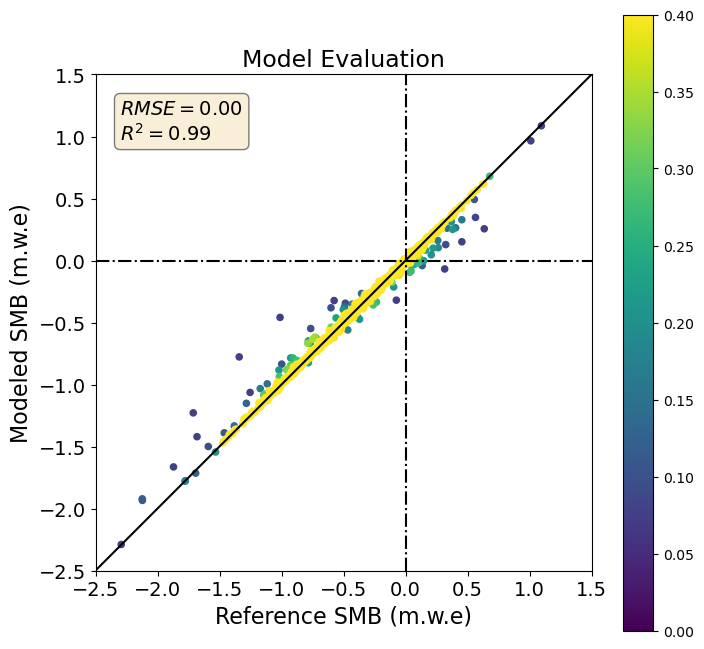

In [71]:
plot_prediction(y_train, reg_ensemble.predict(X_train), n_toplot=5000)

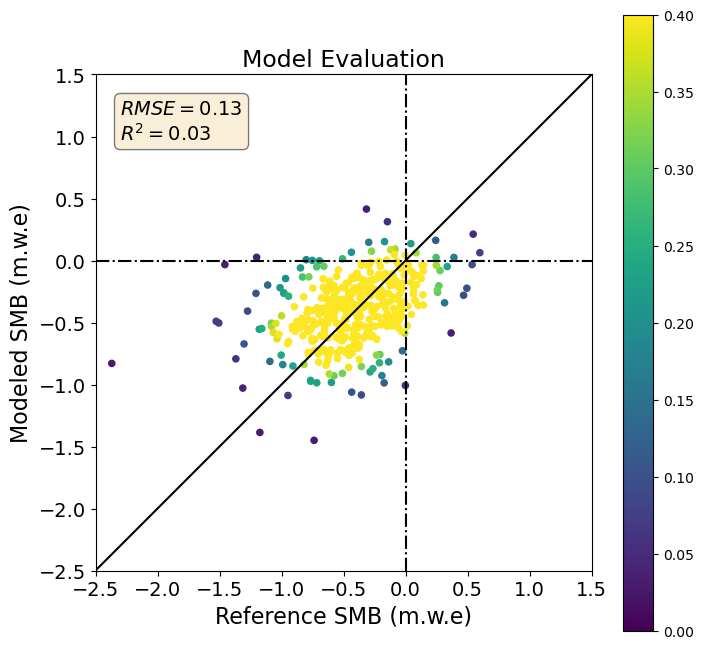

In [72]:
plot_prediction(y_validation, reg_ensemble.predict(X_validation), n_toplot=5000)